## Agenda

1. Matplotlib
2. Seaborn
3. Plotly

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from warnings import filterwarnings
filterwarnings("ignore")

## Matplotlib

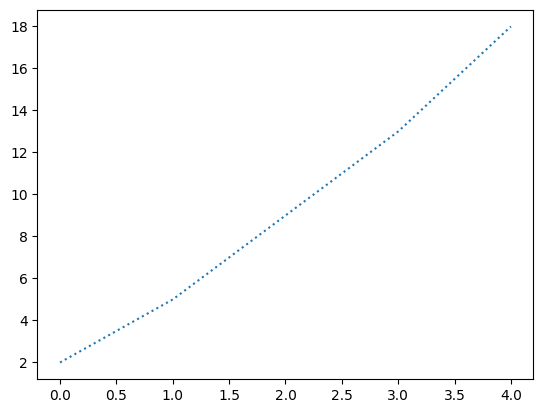

{'-': '_draw_solid', '--': '_draw_dashed', '-.': '_draw_dash_dot', ':': '_draw_dotted', 'None': '_draw_nothing', ' ': '_draw_nothing', '': '_draw_nothing'}


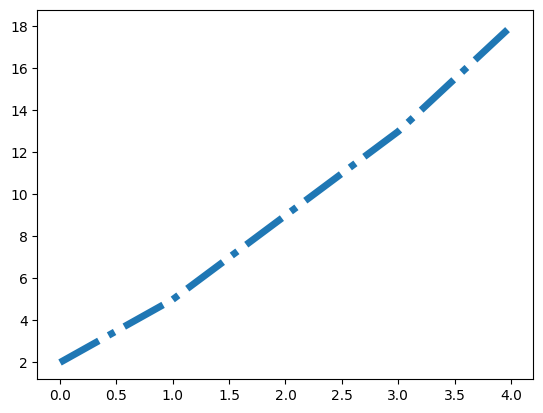

In [2]:
y = [2, 5, 9, 13, 18]

plt.plot(y, linestyle='dotted')
plt.show()

plt.plot(y, linestyle='-.', linewidth=5);

print(matplotlib.lines.lineStyles)

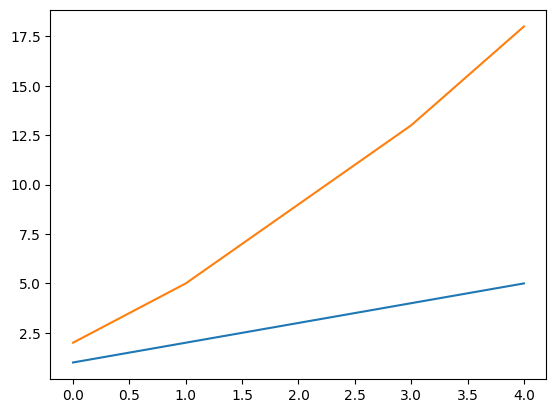

In [3]:
y1 = [1, 2, 3, 4, 5]
y2 = [2, 5, 9, 13, 18]

plt.plot(y1)
plt.plot(y2);

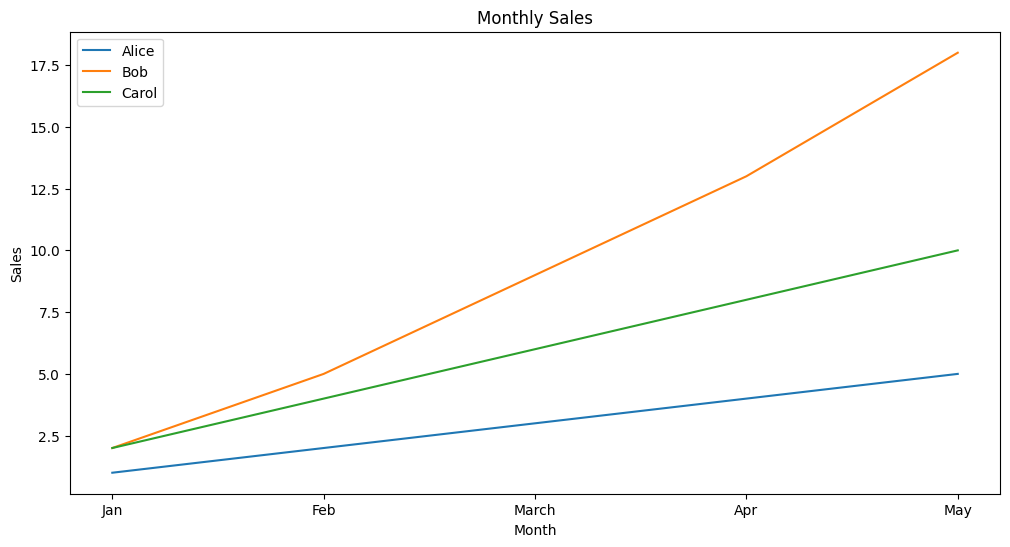

In [4]:
x = ['Jan', 'Feb', 'March', 'Apr', 'May']
y1 = [1, 2, 3, 4, 5]
y2 = [2, 5, 9, 13, 18]
y3 = [2, 4, 6, 8, 10]


fig = plt.figure(figsize=(12, 6))
plt.plot(x, y1, x, y2, x, y3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.legend(labels=['Alice', 'Bob', 'Carol'], loc='upper left');

In [5]:
df = pd.read_csv("../data/titanic.csv")
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


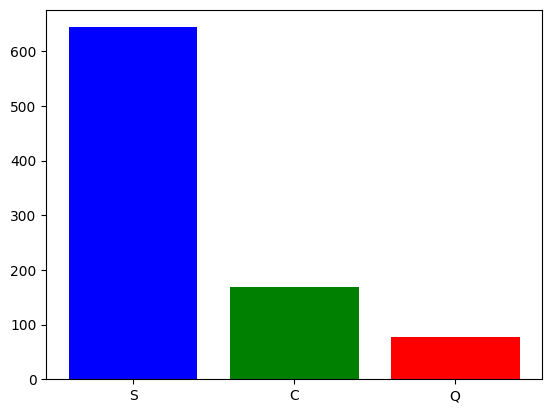

In [6]:
temp = df["embarked"].value_counts()
plt.bar(x=temp.index, height=temp.values, color=['blue', 'green', 'red']);

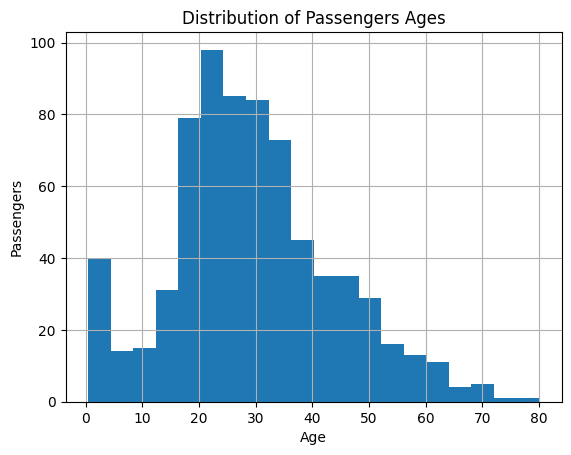

In [7]:
plt.hist(df["age"], bins=20)

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Distribution of Passengers Ages')
plt.grid(True);

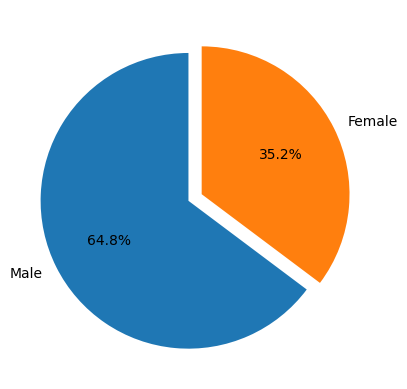

In [8]:
plt.pie(df["sex"].value_counts(),
        labels=['Male', 'Female'],
        startangle=90,
        autopct='%.1f%%',
        explode=[0.1, 0]);

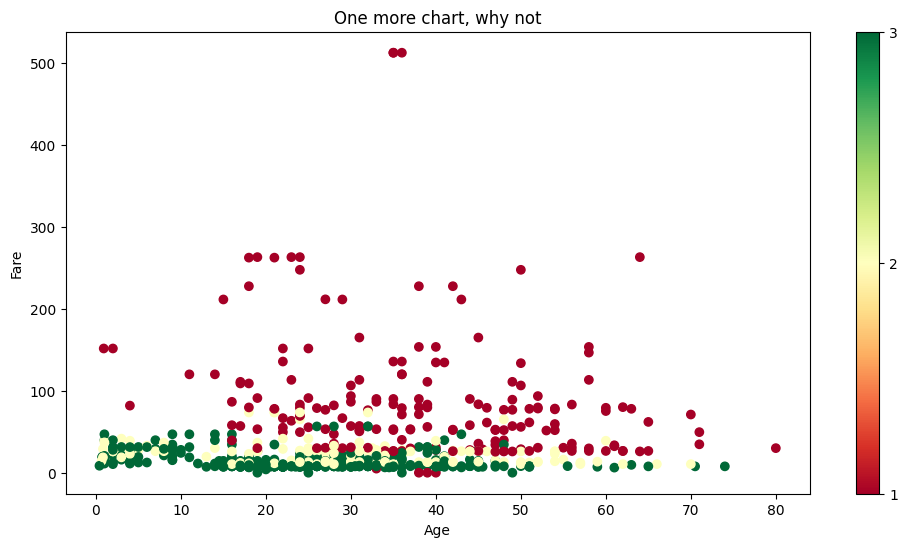

In [9]:
age = df['age']
fare = df['fare']
pclass = df['pclass']

fig = plt.figure(figsize=(12, 6))
plt.scatter(x=age, y=fare, c=pclass, cmap='RdYlGn')
plt.colorbar(ticks=[1, 2, 3])
plt.title("One more chart, why not")
plt.xlabel('Age')
plt.ylabel('Fare');

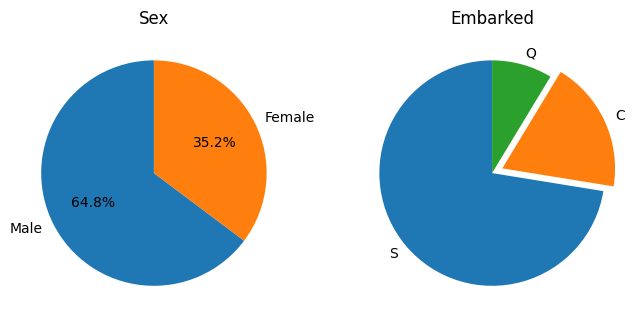

In [10]:
s_vals = df['sex'].value_counts()
e_vals = df['embarked'].value_counts()

fig, axes = plt.subplots(1, 2) # create a grid with 1 row, 2 columns
fig.set_size_inches(8, 4) # make the figure wide

# Create a pie chart in the first grid slot
axes[0].pie(s_vals, labels=['Male', 'Female'], startangle=90, autopct='%.1f%%')
axes[0].set_title('Sex')

# Create a pie chart in the second grid slot
axes[1].pie(e_vals, labels=['S', 'C', 'Q'], startangle=90, explode=[0, 0.1, 0])
axes[1].set_title('Embarked');

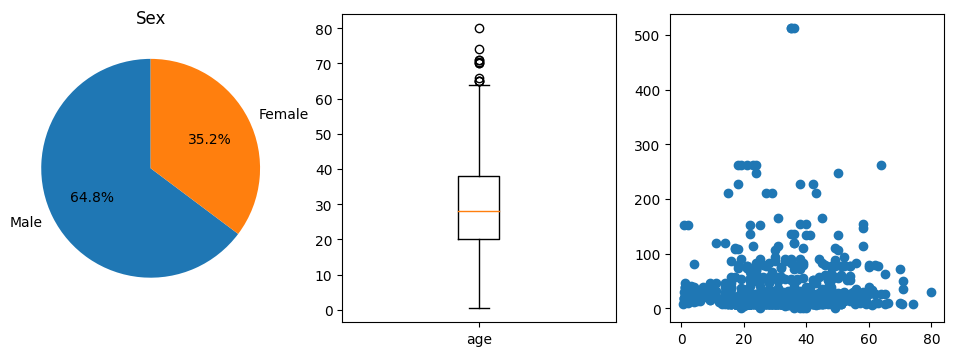

In [11]:
fig, axes = plt.subplots(1, 3) # create a grid with 1 row, 3 columns
fig.set_size_inches(12, 4) # make the figure wide

# Create a pie chart in the first grid slot
axes[0].pie(s_vals, labels=['Male', 'Female'], startangle=90, autopct='%.1f%%')
axes[0].set_title('Sex')

# Create a box plot in the second grid slot
age = df['age'].dropna() # Drop missing values before plotting or the boxplot will be empty
axes[1].boxplot(age, labels=['age']);

# Create a scatter plot in the third grid slot
axes[2].scatter(x=df['age'], y=df['fare']);

## Seaborn

In [12]:
df = sns.load_dataset('car_crashes')
print(df.shape)
df.head(2)

(51, 8)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK


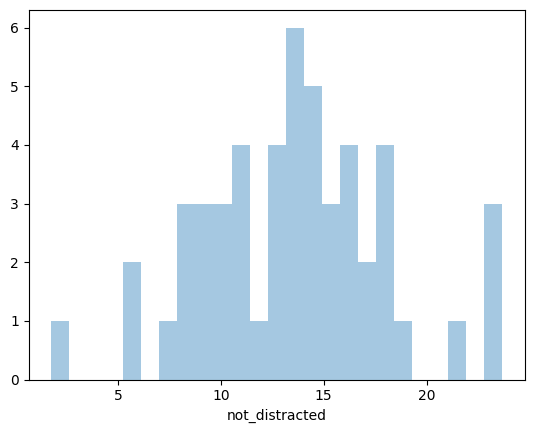

In [13]:
sns.distplot(df['not_distracted'], kde=False, bins=25);

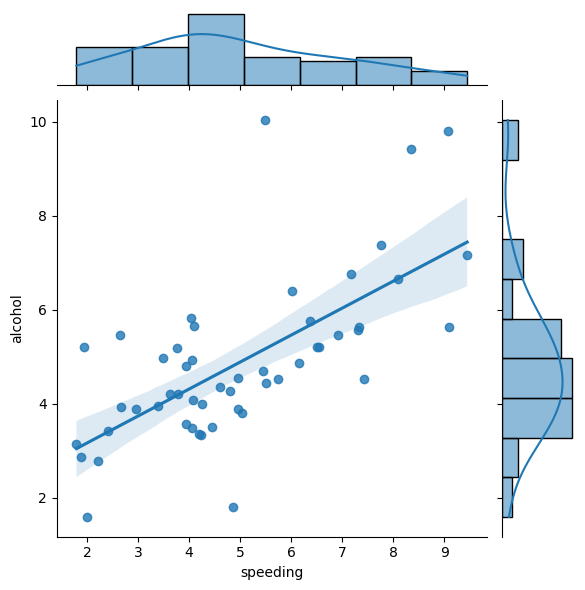

In [14]:
sns.jointplot(x='speeding', y='alcohol', data=df, kind='reg');

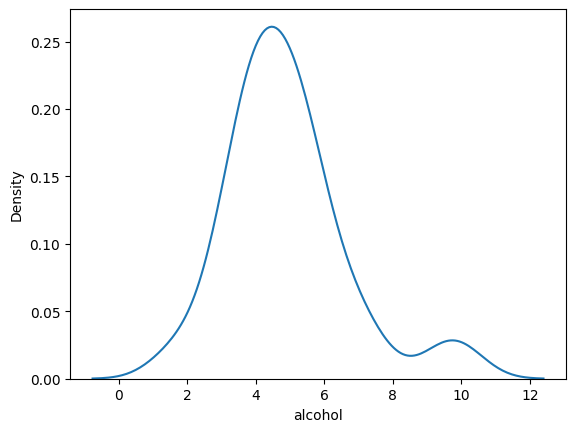

In [15]:
sns.kdeplot(df['alcohol']);

CPU times: user 3.13 s, sys: 3.54 ms, total: 3.13 s
Wall time: 3.13 s


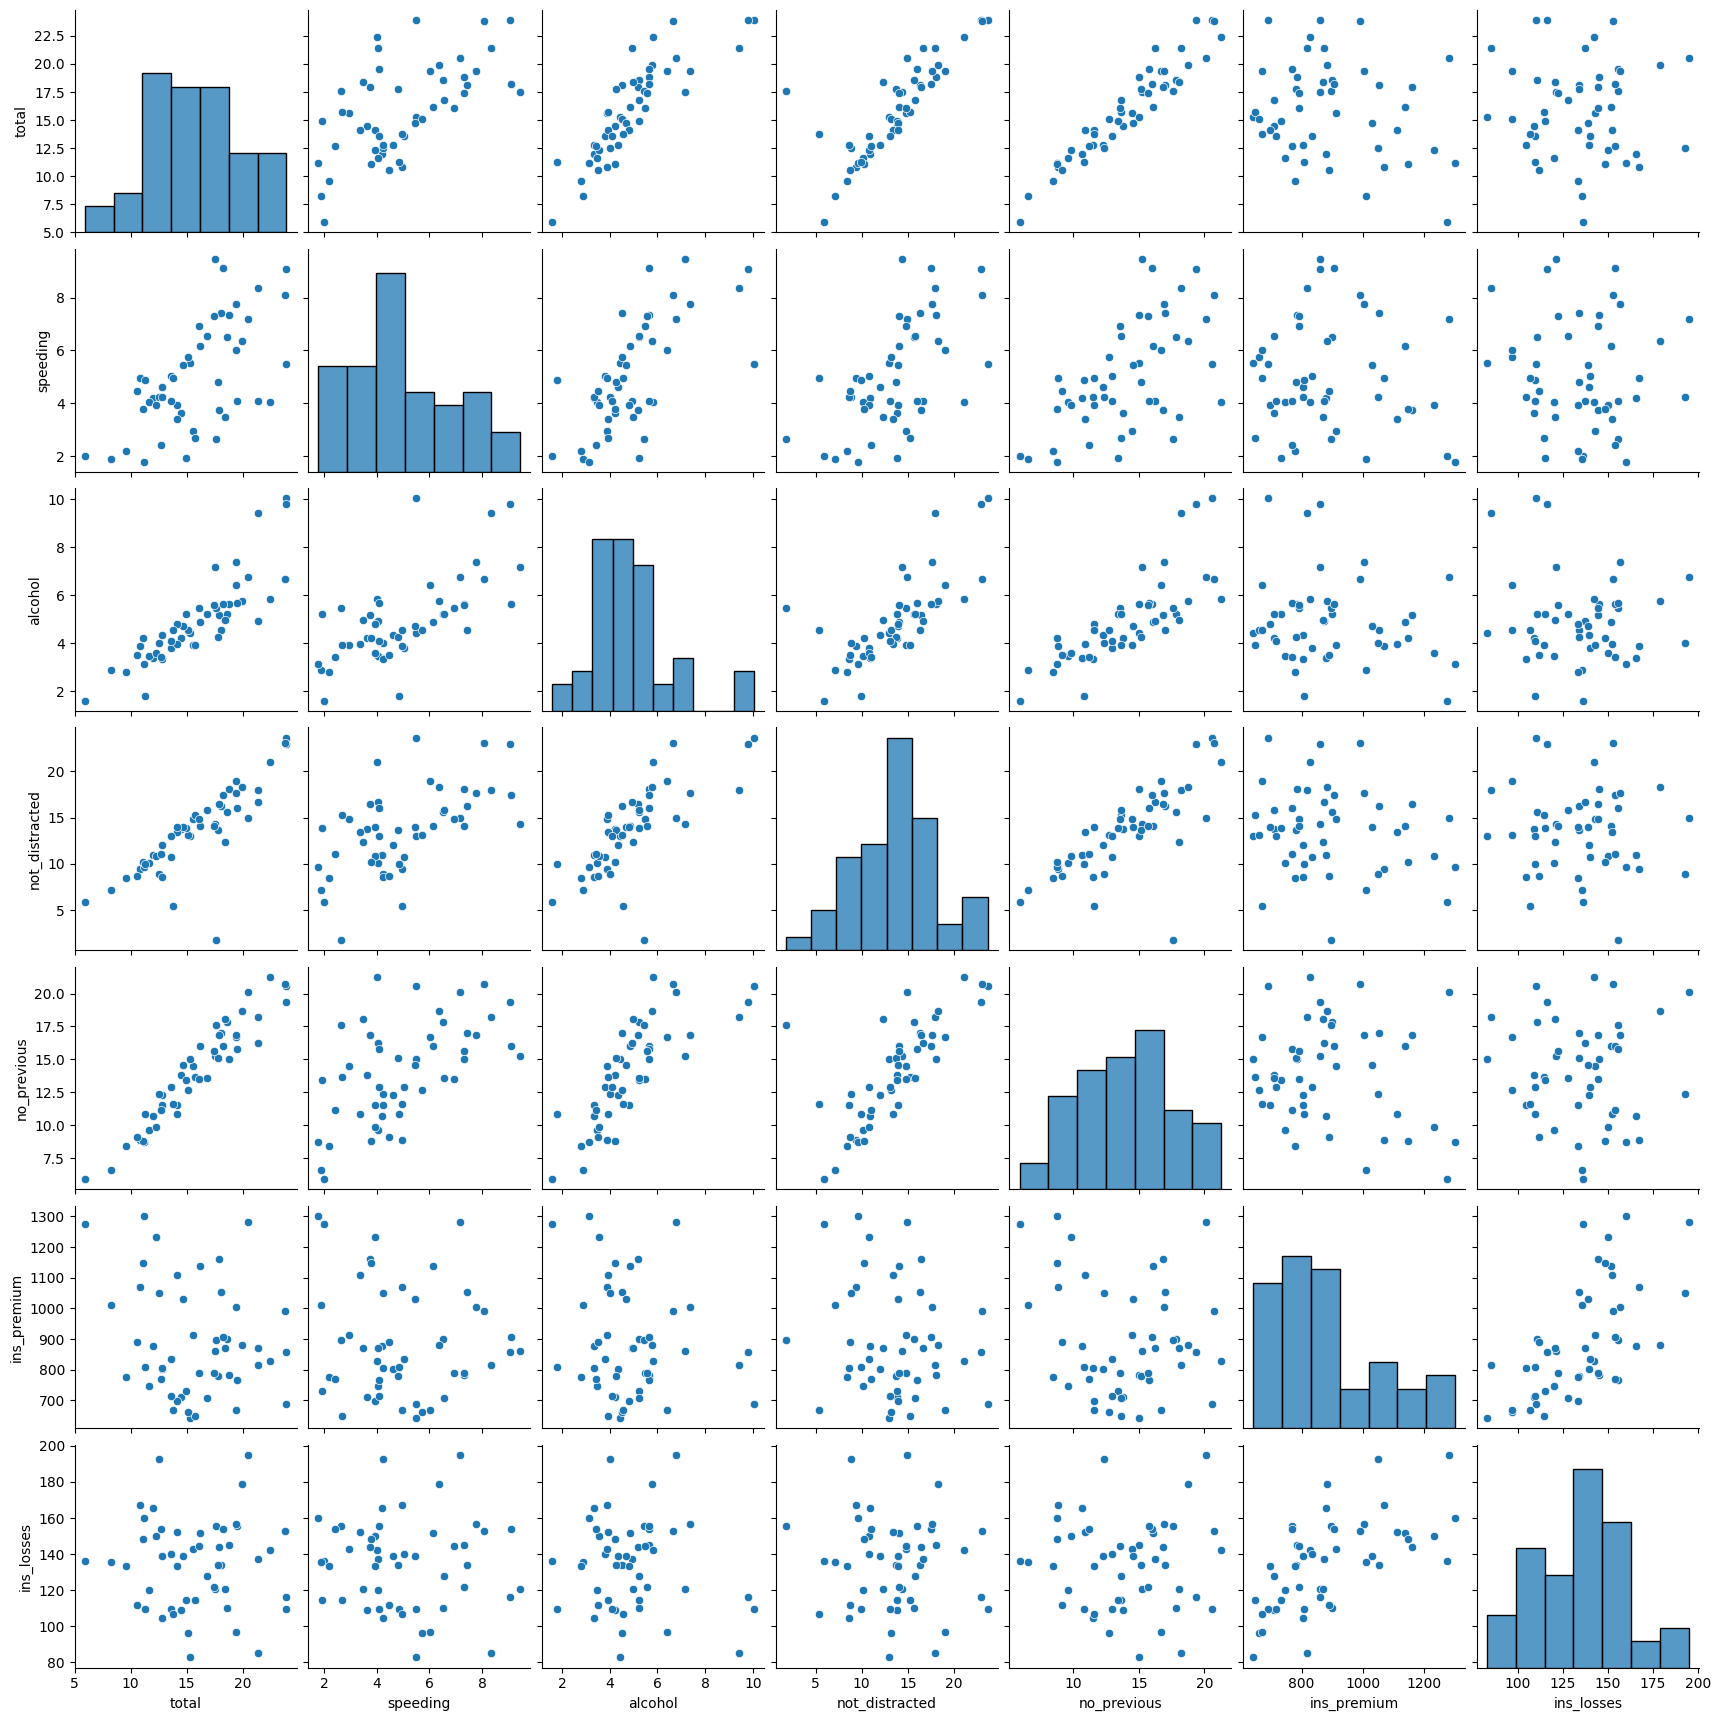

In [16]:
%%time
sns.pairplot(df);

In [17]:
df = pd.read_csv("../data/titanic.csv")
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


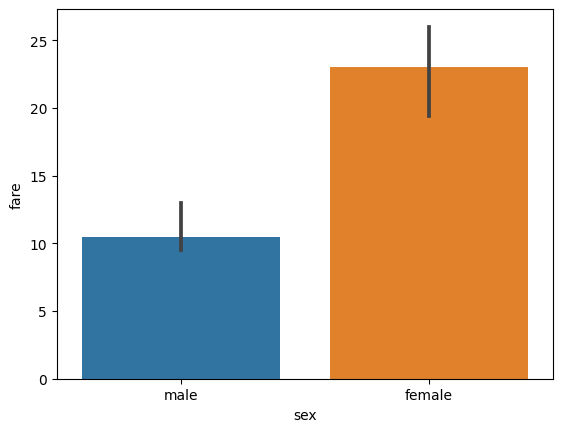

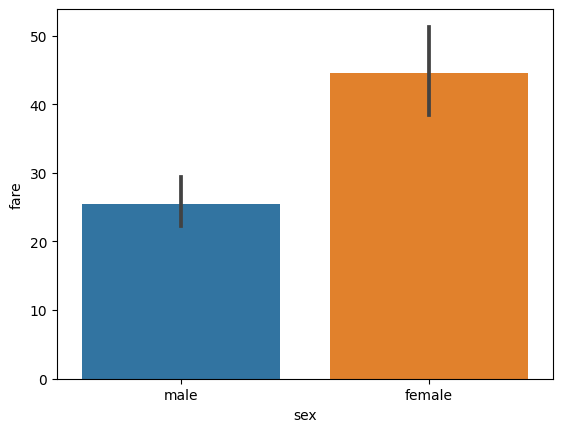

In [18]:
sns.barplot(x='sex',y='fare',data=df, estimator=np.median)
plt.show()

sns.barplot(x='sex',y='fare',data=df, estimator=np.mean)
plt.show()

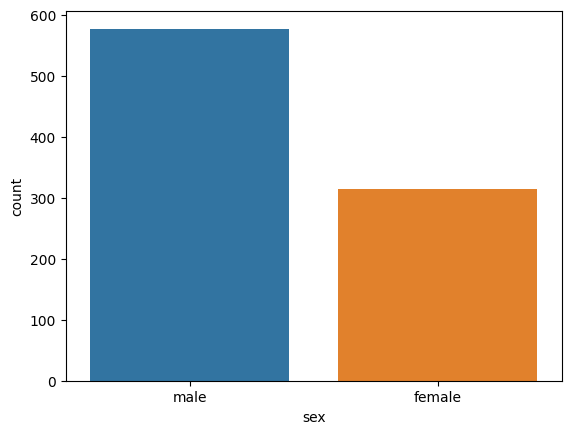

In [19]:
sns.countplot(x='sex',data=df);

[]

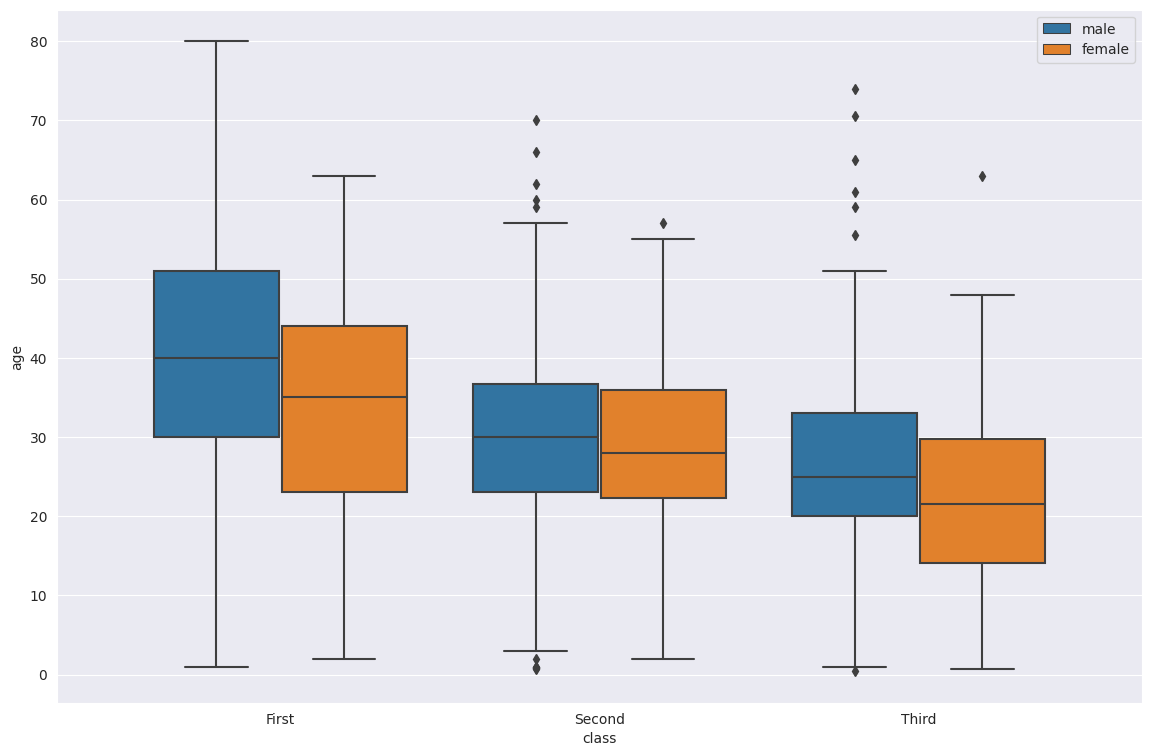

In [20]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

sns.boxplot(x='class',y='age',data=df.sort_values("class"), hue='sex')
plt.legend(loc=0)
plt.plot()

[]

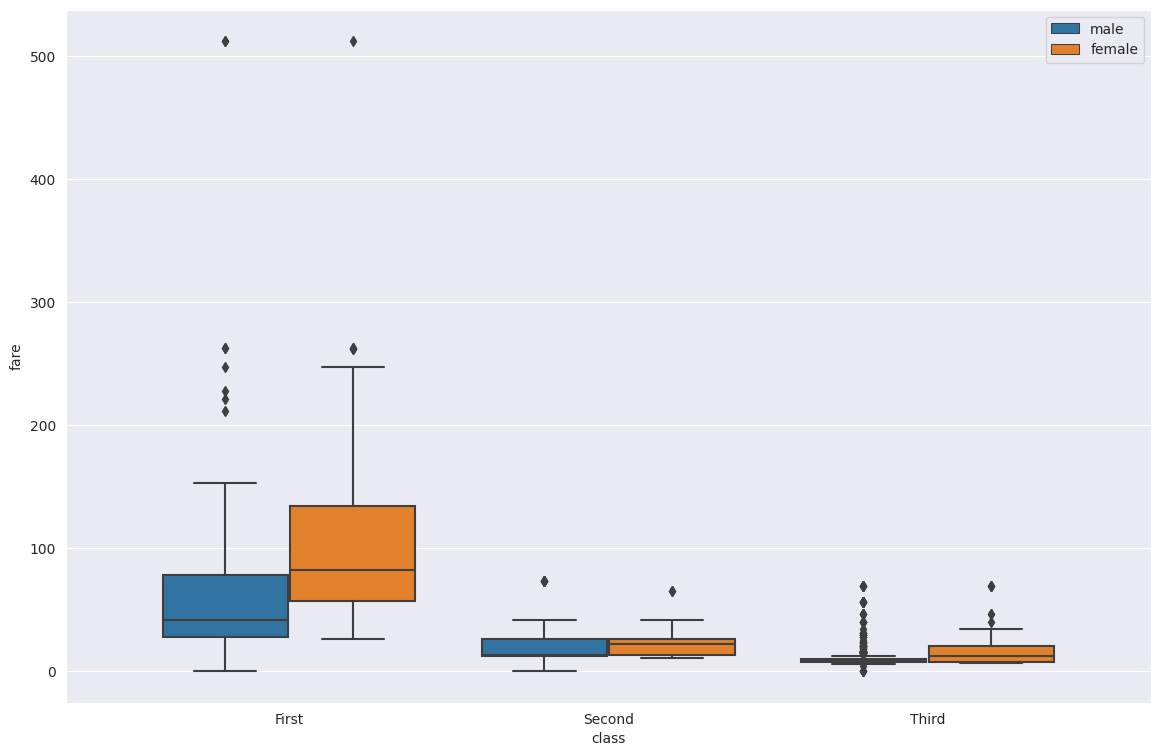

In [21]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

sns.boxplot(x='class',y='fare',data=df.sort_values("class"), hue='sex')
plt.legend(loc=0)
plt.plot()

[]

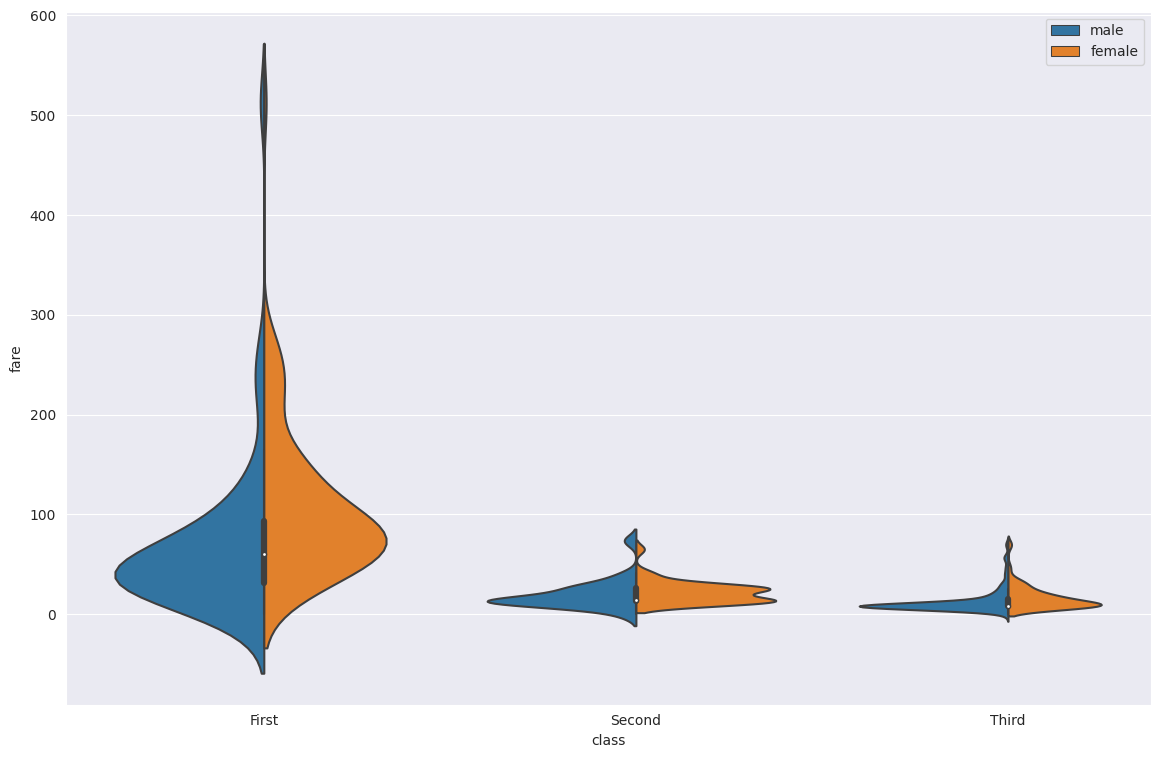

In [22]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

sns.violinplot(x='class',y='fare',data=df.sort_values("class"), hue='sex', split=True)
plt.legend(loc=0)
plt.plot()

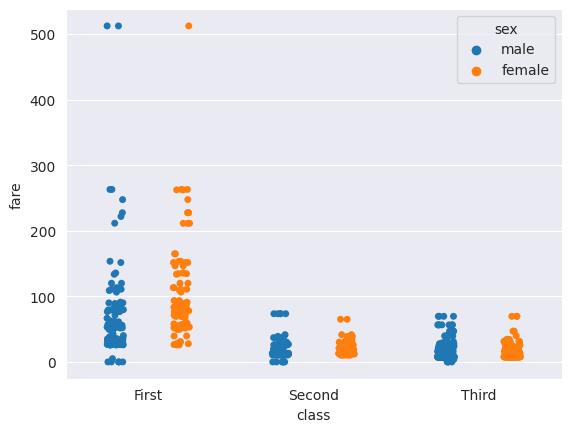

In [23]:
sns.stripplot(x='class',
              y='fare',
              data=df.sort_values("class"),
              jitter=True, 
              hue='sex',
              dodge=True);

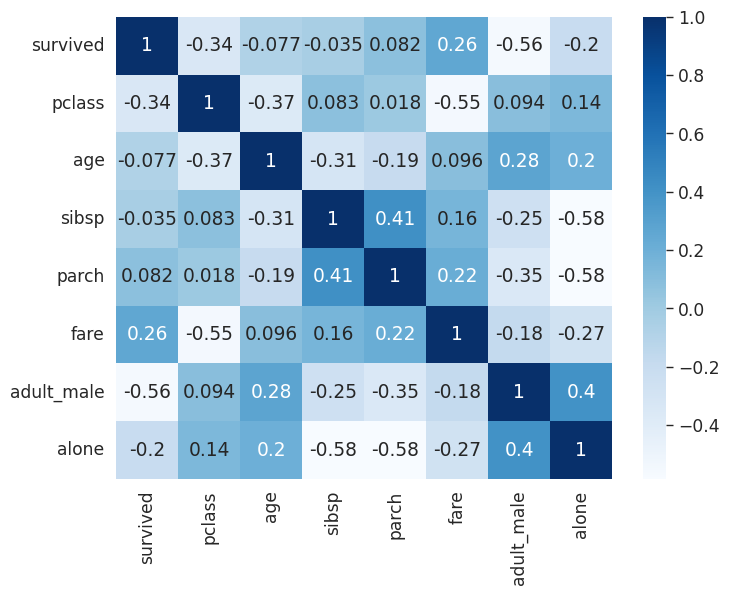

In [24]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corr = df[df.dtypes[df.dtypes != "object"].index].corr()
sns.heatmap(corr, annot=True, cmap='Blues');

<Axes: xlabel='year', ylabel='month'>

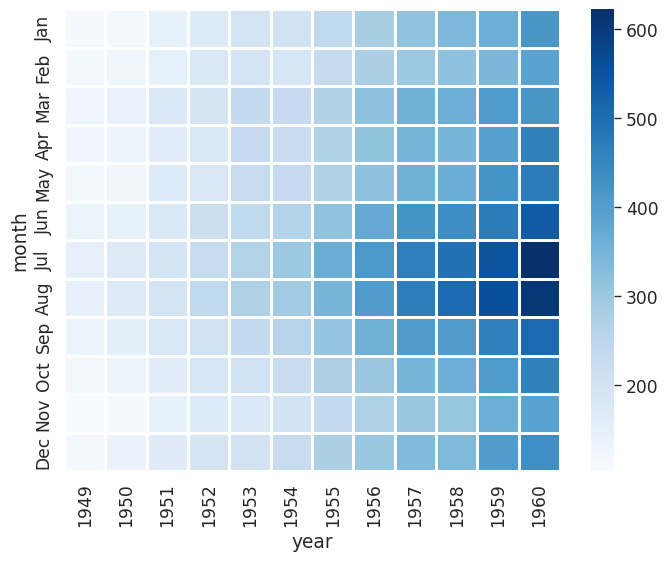

In [25]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

In [26]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

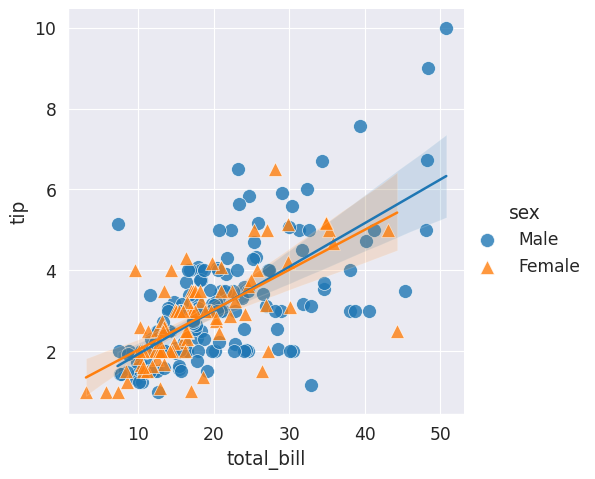

In [27]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})
plt.show()

## Plotly

In [28]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

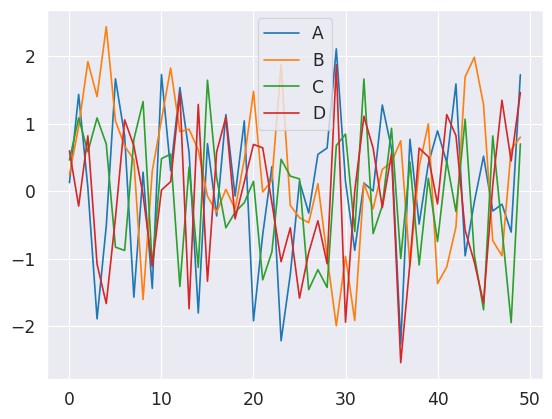

In [29]:
# Create a dataframe using a NumPy array that is 50 by 4
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns=['A','B','C','D'])
df_1.head()

df_1.plot()
df_1.iplot()

In [30]:
# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

# Use included Google price data to make one plot
df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', labels={'x':'Date', 'y':'Price'})

# Make multiple line plots
px.line(df_stocks, x='date', y=['GOOG','AAPL'], labels={'x':'Date', 'y':'Price'},
       title='Apple Vs. Google')

# Create a figure to which I'll add plots
fig = go.Figure()
# You can pull individual columns of data from the dataset and use markers or not
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, 
                        mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, 
                        mode='lines+markers', name='Amazon'))
# You can create custom lines (Dashes : dash, dot, dashdot)
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, 
                        mode='lines+markers', name='Google',
                        line=dict(color='firebrick', width=2, dash='dashdot')))
# Further style the figure
# fig.update_layout(title='Stock Price Data 2018 - 2020',
#                    xaxis_title='Price', yaxis_title='Date')

# Go crazy styling the figure
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    # Turn off everything on y axis
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

In [31]:
# Get population change in US by querying for US data
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')

# Create a stacked bar with more customization
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on Each Day',
      labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})

# Place bars next to each other
px.bar(df_tips, x="sex", y="total_bill",
             color='smoker', barmode='group')

# Display pop data for countries in Europe in 2007 greater than 2000000
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)

In [32]:
# Use included Iris data set
df_iris = px.data.iris()
# Create a scatter plot by defining x, y, different color for count of provided
# column, size based on supplied column and additional data to display on hover
px.scatter(df_iris, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])

# Create a customized scatter with black marker edges with line width 2, opaque
# and colored based on width. Also show a scale on the right
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_iris.sepal_width, y=df_iris.sepal_length,
    mode='markers',
    marker_color=df_iris.sepal_width,
    text=df_iris.species,
    marker=dict(showscale=True)
))
fig.update_traces(marker_line_width=2, marker_size=10)
fig

In [33]:
# Create Pie chart of the largest nations in Asia
# Color maps here plotly.com/python/builtin-colorscales/
df_samer = px.data.gapminder().query("year == 2007").query("continent == 'Asia'")
px.pie(df_samer, values='pop', names='country', 
       title='Population of Asian continent', 
       color_discrete_sequence=px.colors.sequential.RdBu)

# Customize pie chart
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal','Psychic', 'Fire', 'Ground'], 
                       values=[110,90,80,80,70,60])])
# Define hover info, text size, pull amount for each pie slice, and stroke
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo='label+percent', pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))

In [34]:
# Plot histogram based on rolling 2 dice
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum = dice_1 + dice_2
# bins represent the number of bars to make
# Can define x label, color, title
# marginal creates another plot (violin, box, rug)
fig = px.histogram(dice_sum, nbins=11, labels={'value':'Dice Roll'},
             title='5000 Dice Roll Histogram', marginal='violin',
            color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title_text='Dice Roll',
    yaxis_title_text='Dice Sum',
    bargap=0.2, showlegend=False
)

# Stack histograms based on different column data
df_tips = px.data.tips()
px.histogram(df_tips, x="total_bill", color="sex")

In [35]:
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median 
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
df_tips = px.data.tips()
# We can see which sex tips the most, points displays all the data points
px.box(df_tips, x='sex', y='tip', points='all')

# Display tip sex data by day
px.box(df_tips, x='day', y='tip', color='sex')

# Adding standard deviation and mean
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue',
                    boxmean='sd'))

# Complex Styling
df_stocks = px.data.stocks()
fig = go.Figure()
# Show all points, spread them so they don't overlap and change whisker width
fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all', name='Google',
                    fillcolor='blue', jitter=0.5, whiskerwidth=0.2))
fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all', name='Apple',
                    fillcolor='red', jitter=0.5, whiskerwidth=0.2))
# Change background / grid colors
fig.update_layout(title='Google vs. Apple', 
                  yaxis=dict(gridcolor='rgb(255, 255, 255)',
                 gridwidth=3),
                 paper_bgcolor='rgb(243, 243, 243)',
                 plot_bgcolor='rgb(243, 243, 243)')

In [36]:
# Create a 3D scatter plot using flight data
# Create a heatmap using Seaborn data
flights = sns.load_dataset("flights")

fig = px.scatter_3d(flights, x='year', y='month', z='passengers', color='year',
                   opacity=0.7, width=800, height=400)
fig

In [37]:
# Polar charts display data radially 
# Let's plot wind data based on direction and frequency
# You can change size and auto-generate different symbols as well
df_wind = px.data.wind()
px.scatter_polar(df_wind, r="frequency", theta="direction", color="strength",
                size="frequency", symbol="strength")

# Data can also be plotted using lines radially
# A template makes the data easier to see
px.line_polar(df_wind, r="frequency", theta="direction", color="strength",
                line_close=True, template="plotly_dark", width=800, height=400)

In [38]:
# Create an animated plot that you can use to cycle through continent
# GDP & life expectancy changes
df_cnt = px.data.gapminder()
px.scatter(df_cnt, x="gdpPercap", y="lifeExp", animation_frame="year", 
           animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [39]:
# Watch as bars chart population changes
px.bar(df_cnt, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])